In [1]:
%pip install scikit-learn pandas matplotlib seaborn imbalanced-learn scipy numpy mlxtend networkx shap

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.4/1.4 MB 8.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.7/1.7 MB 13.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 548.1/548.1 kB 12.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.8/2.8 MB 13.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 26.2/26.2 MB 13.4 MB/s eta 0:00:00a 0:00:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8/8 [mlxtend]m6/8 [shap]]te]
Note: you may need to restart the kernel to use 

In [2]:
import os
os.environ['SCIPY_ARRAY_API'] = '1'

# Relat√≥rio de pr√© processamento do pi 6 semestre
### Este documento tem como finalidade explicar como foi realizado o pr√© processamento da base do pi

Aluno: K√©ssia Rodrigues Borges

A base utilizada √© uma base com dados de pessoas diab√©ticas(2), n√£o diab√©ticas(0) e pr√© diab√©ticas(1)
O objetivo do trabalho final √© obter uma recomenda√ß√£o confi√°vel, onde com base nos dados inputados pelo usu√°rio, possa classific√°-lo e recomendar bons h√°bitos

---

### 1. Inicializa√ß√£o e defini√ß√£o de atributos

```python
class PreProcessor:
    def __init__(self, path='diabetes_012_health_indicators_BRFSS2015.csv'):
        self.path = path
        self.colunas_irrelevantes = ['AnyHealthcare', 'NoDocbcCost', 'Income', 'Education']
        self.scaler = StandardScaler()
        self.df = pd.read_csv(self.path)
```

* **`self.path`**: caminho do arquivo de entrada.
* **`self.colunas_irrelevantes`**: lista das features que ser√£o removidas por baixa relev√¢ncia, baseada em an√°lise de correla√ß√£o.
* **`self.scaler`**: inst√¢ncia do `StandardScaler`, que normaliza as features para m√©dia 0 e desvio padr√£o 1.
* **`self.df`**: DataFrame com os dados carregados do arquivo CSV.

---

### 2. An√°lise de correla√ß√£o

```python
def correlation(self):
    correlacao = self.df.corr()
    plt.figure(figsize=(14, 10))
    sns.heatmap(correlacao, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
    plt.title('Matriz de Correla√ß√£o da Base de Diabetes')
    plt.show()
```

* **`self.df.corr()`**: calcula a matriz de correla√ß√£o de Pearson entre todas as colunas num√©ricas do DataFrame.
* **Heatmap**: visualiza rapidamente rela√ß√µes lineares entre atributos e a vari√°vel alvo (`Diabetes_012`), embasando a exclus√£o de vari√°veis irrelevantes.

---

### 3. Pr√©-processamento e limpeza

```python
def pre_process(self, arquivo_saida):
    self.correlation()
    self.df = self.df.drop(columns=self.colunas_irrelevantes)
    valores_nulos = self.df.isnull().sum()
    print(valores_nulos)
    X = self.df.drop('Diabetes_012', axis=1)
    y = self.df['Diabetes_012']
    X_norm = self.scaler.fit_transform(X)
    self.df_normalizado = pd.DataFrame(X_norm, columns=X.columns)
    self.df_normalizado['Diabetes_012'] = y.reset_index(drop=True)
    self.df_normalizado.to_csv(arquivo_saida, index=False)
```

#### **Passos detalhados:**

1. **`self.correlation()`**: mostra a matriz de correla√ß√£o antes da remo√ß√£o das colunas.
2. **Remo√ß√£o das colunas irrelevantes**: `self.df.drop(columns=self.colunas_irrelevantes)` elimina vari√°veis que n√£o contribuem para a predi√ß√£o.
3. **Checagem de valores nulos**: `self.df.isnull().sum()` exibe a contagem de nulos por coluna, auxiliando na identifica√ß√£o de inconsist√™ncias.
4. **Separa√ß√£o de vari√°veis**:

   * `X = self.df.drop('Diabetes_012', axis=1)`: atributos preditores.
   * `y = self.df['Diabetes_012']`: vari√°vel alvo.
5. **Normaliza√ß√£o**:
   * Esse processo foi executado apenas depois dos dados tratados j√° exportados para um csv, j√° que para algumas partes do processo, √© necess√°rio o valor categ√≥rico da coluna (0 e 1) 
   * `self.scaler.fit_transform(X)` ajusta os dados para m√©dia 0 e desvio padr√£o 1, fundamental para m√©todos baseados em dist√¢ncia como KNN.
6. **Cria√ß√£o do DataFrame final**:

   * Junta os dados normalizados e a coluna alvo em um novo DataFrame.
7. **Exporta√ß√£o**:

   * `to_csv(arquivo_saida, index=False)` salva o resultado em CSV pronto para modelagem.



In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

class PreProcessor:
	def __init__(self, path='diabetes_012_health_indicators_BRFSS2015.csv'):
			self.path = path
			self.colunas_irrelevantes = ['AnyHealthcare', 'NoDocbcCost', 'Income', 'Education']
			self.scaler = StandardScaler()
			self.df = pd.read_csv(self.path)

	def correlation(self): 
		# Aqui √© exibida a matriz de correla√ß√£o para julgar se faz sentido as colunas que ser√£o exclu√≠das, 
		# Com base nos dados obtidos no gr√°fico, remover as colunas ['AnyHealthcare', 'NoDocbcCost', 'Income', 'Education'] faz sentido
		correlacao = self.df.corr()
		plt.figure(figsize=(14, 10))
		sns.heatmap(correlacao, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
		plt.title('Matriz de Correla√ß√£o da Base de Diabetes')
		plt.show()

	def pre_process(self, arquivo_saida): 
		# Exibe a correla√ß√£o
		self.correlation()
		# Remove as colunas irrelevantes
		self.df = self.df.drop(columns=self.colunas_irrelevantes)
		valores_nulos = self.df.isnull().sum()

		# Exibir valores nulos
		print(valores_nulos)
		# Remove a classe
		X = self.df.drop('Diabetes_012', axis=1)
		y = self.df['Diabetes_012']

		# Verificando quantas instancias tem para cada classe
		print(y.value_counts())


		# Salva a base
		self.df_normalizado = pd.DataFrame(X, columns=X.columns)
		self.df_normalizado['Diabetes_012'] = y.reset_index(drop=True)
		self.df_normalizado.to_csv(arquivo_saida, index=False)






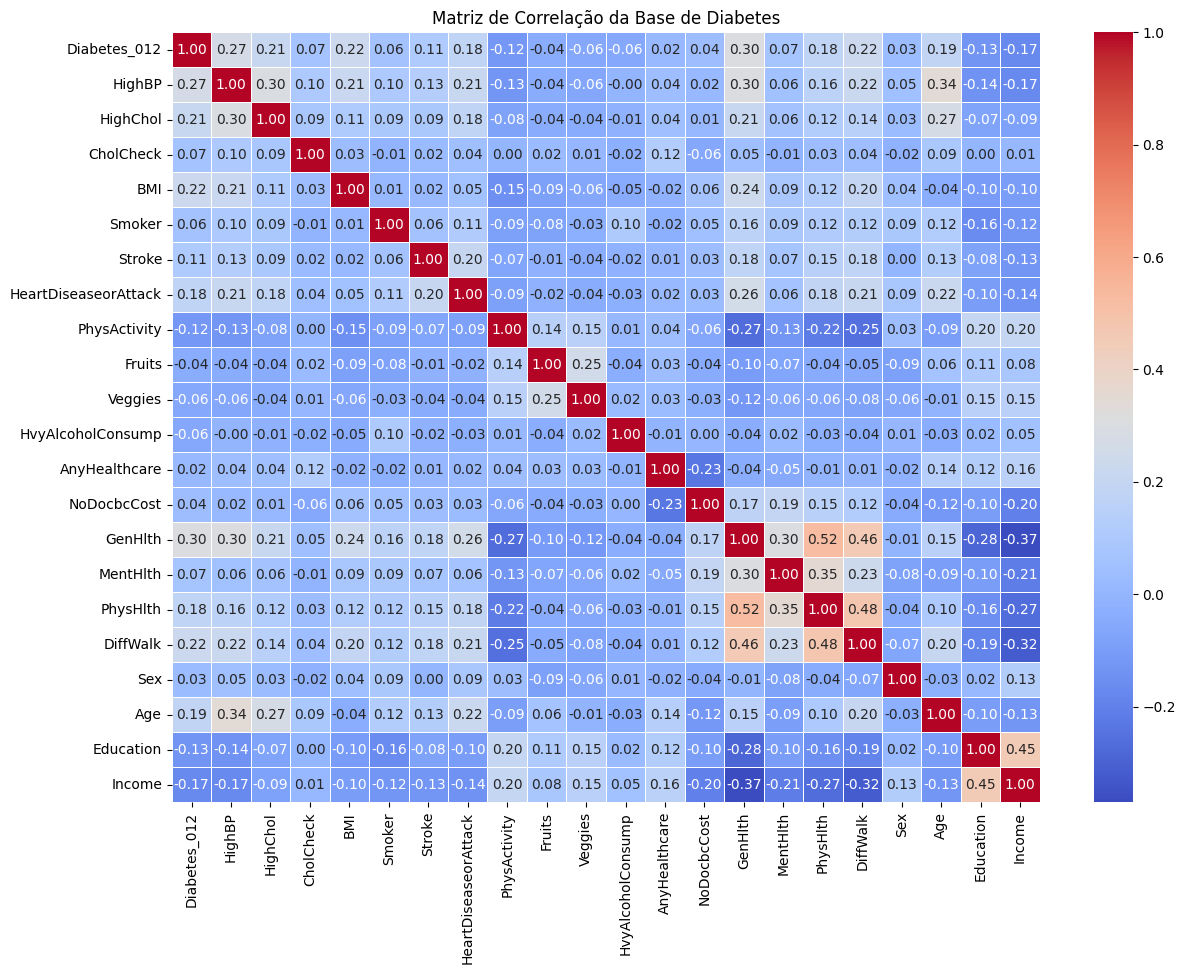

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
dtype: int64
Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64


In [4]:
pre_processor = PreProcessor()
pre_processor.pre_process("cleaned.csv")

In [5]:
df = pd.read_csv("cleaned.csv")

df.info()
X = df.drop("Diabetes_012", axis=1)
Y = df["Diabetes_012"]

# Executa a normaliza√ß√£o ap√≥s leitura do dataframe pois o original ser√° utilizado no apriori
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_norm  = scaler.fit_transform(X)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                253680 non-null  float64
 1   HighChol              253680 non-null  float64
 2   CholCheck             253680 non-null  float64
 3   BMI                   253680 non-null  float64
 4   Smoker                253680 non-null  float64
 5   Stroke                253680 non-null  float64
 6   HeartDiseaseorAttack  253680 non-null  float64
 7   PhysActivity          253680 non-null  float64
 8   Fruits                253680 non-null  float64
 9   Veggies               253680 non-null  float64
 10  HvyAlcoholConsump     253680 non-null  float64
 11  GenHlth               253680 non-null  float64
 12  MentHlth              253680 non-null  float64
 13  PhysHlth              253680 non-null  float64
 14  DiffWalk              253680 non-null  float64
 15  

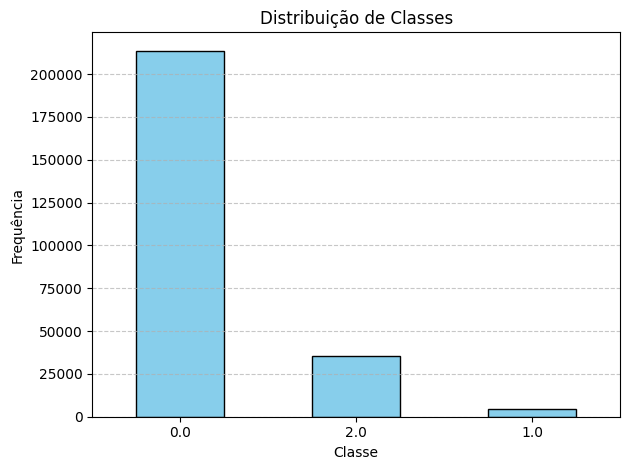

In [6]:
contagem_classes = df['Diabetes_012'].value_counts()

contagem_classes.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribui√ß√£o de Classes')
plt.xlabel('Classe')
plt.ylabel('Frequ√™ncia')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
from imblearn.combine import SMOTEENN

smoteenn = SMOTEENN(random_state=42)
X_combined, y_combined = smoteenn.fit_resample(X_norm, Y)

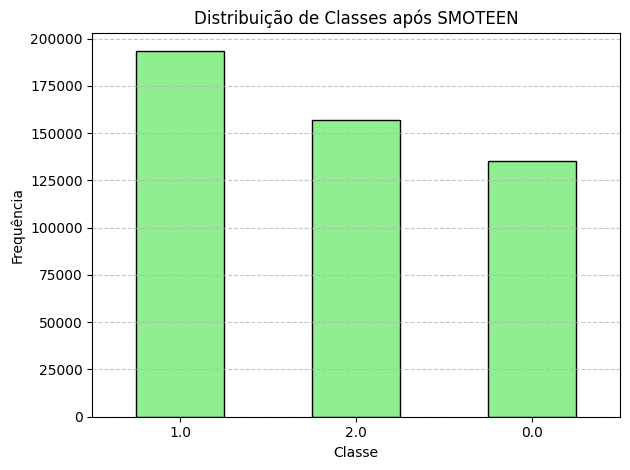

In [ ]:
y_res_series = pd.Series(y_combined, name='Diabetes_012')


contagem_classes = y_res_series.value_counts()


contagem_classes.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Distribui√ß√£o de Classes ap√≥s SMOTEEN')
plt.xlabel('Classe')
plt.ylabel('Frequ√™ncia')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, train_size=0.2, random_state=32, stratify=Y)

scoring = {
    'accuracy': 'accuracy',
    'f1_macro': 'f1_macro',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro'
}

models = {
    "KNN": (KNeighborsClassifier(n_neighbors=5), {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }),
    "RandomForest": (RandomForestClassifier(n_estimators=100, random_state=32), {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20]
        }),
    "GradientBoosting": (GradientBoostingClassifier(random_state=32),   {
            'n_estimators': [100, 200],
            'learning_rate': [0.05, 0.1],
            'max_depth': [3, 5]
        })
}


results = []


In [ ]:
# Avalia√ß√£o com SMOTEEN
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_combined, y_combined, train_size=0.2, random_state=32, stratify=y_combined)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
for name, (model, grid) in models.items():
		print(f"\nüîµ Avaliando {name} sem SMOTEENN...")
		scores_sem = cross_validate(model, X_train, y_train, cv=5, scoring=scoring, n_jobs=-1)
		results.append({
        'modelo': name,
        'cenario': 'Sem SMOTEENN',
        'accuracy': scores_sem['test_accuracy'].mean(),
        'f1_macro': scores_sem['test_f1_macro'].mean(),
        'precision_macro': scores_sem['test_precision_macro'].mean(),
        'recall_macro': scores_sem['test_recall_macro'].mean()
    })
                
		print(f"üîµ Avaliando {name} com SMOTEENN e GridSearch...")
		grid_search = GridSearchCV(model, grid, scoring='f1_macro', cv=5, n_jobs=-1)
		grid_search.fit(X_train_bal, y_train_bal)
                
		best_model = grid_search.best_estimator_

		print(f"Melhores par√¢metros para {name}: {grid_search.best_params_}")

		# Valida√ß√£o cruzada com melhores par√¢metros
		scores_com = cross_validate(best_model, X_train_bal, y_train_bal, scoring=scoring, cv=5, n_jobs=-1)

		results.append({
				'modelo': name,
				'cenario': 'Com SMOTEENN + GridSearch',
				'accuracy': scores_com['test_accuracy'].mean(),
				'f1_macro': scores_com['test_f1_macro'].mean(),
				'precision_macro': scores_com['test_precision_macro'].mean(),
				'recall_macro': scores_com['test_recall_macro'].mean()
		})

		# Avalia√ß√£o final em X_test_bal
		print(f"\n‚úÖ Avalia√ß√£o final no TESTE para {name} (com SMOTEENN)")
		best_model.fit(X_train_bal, y_train_bal)
		y_pred = best_model.predict(X_test_bal)
		print(classification_report(y_test_bal, y_pred))



üîµ Avaliando KNN sem SMOTEENN...
üîµ Avaliando KNN com SMOTEENN e GridSearch...
Melhores par√¢metros para KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

‚úÖ Avalia√ß√£o final no TESTE para KNN (com SMOTEENN)
              precision    recall  f1-score   support

         0.0       0.92      0.87      0.90    108114
         1.0       0.92      0.96      0.94    154721
         2.0       0.91      0.90      0.91    125539

    accuracy                           0.92    388374
   macro avg       0.92      0.91      0.92    388374
weighted avg       0.92      0.92      0.92    388374


üîµ Avaliando RandomForest sem SMOTEENN...
üîµ Avaliando RandomForest com SMOTEENN e GridSearch...
Melhores par√¢metros para RandomForest: {'max_depth': None, 'n_estimators': 200}

‚úÖ Avalia√ß√£o final no TESTE para RandomForest (com SMOTEENN)
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93    108114
         1.0       0.93   

/home/gabriel/Projetos/Pessoal/kessimha/pi-dsm-6-2025/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gabriel/Projetos/Pessoal/kessimha/pi-dsm-6-2025/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/gabriel/Projetos/Pessoal/kessimha/pi-dsm-6-2025/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

üîµ Avaliando GradientBoosting com SMOTEENN e GridSearch...
Melhores par√¢metros para GradientBoosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

‚úÖ Avalia√ß√£o final no TESTE para GradientBoosting (com SMOTEENN)
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94    108114
         1.0       0.81      0.84      0.83    154721
         2.0       0.76      0.71      0.74    125539

    accuracy                           0.83    388374
   macro avg       0.83      0.83      0.83    388374
weighted avg       0.83      0.83      0.83    388374



In [ ]:
print(results)

[{'modelo': 'KNN', 'cenario': 'Sem SMOTEENN', 'accuracy': np.float64(0.8293321947427993), 'f1_macro': np.float64(0.39021726440898585), 'precision_macro': np.float64(0.4317702263355464), 'recall_macro': np.float64(0.38368321982082304)}, {'modelo': 'KNN', 'cenario': 'Com SMOTEENN + GridSearch', 'accuracy': np.float64(0.9021453627508327), 'f1_macro': np.float64(0.8986701928473675), 'precision_macro': np.float64(0.9031704681425362), 'recall_macro': np.float64(0.895568808849742)}, {'modelo': 'RandomForest', 'cenario': 'Sem SMOTEENN', 'accuracy': np.float64(0.8351071588989898), 'f1_macro': np.float64(0.39748558325022204), 'precision_macro': np.float64(0.4497978008265119), 'recall_macro': np.float64(0.38804975220018145)}, {'modelo': 'RandomForest', 'cenario': 'Com SMOTEENN + GridSearch', 'accuracy': np.float64(0.9072744815847745), 'f1_macro': np.float64(0.9060383649898114), 'precision_macro': np.float64(0.907438917631486), 'recall_macro': np.float64(0.9049393406977924)}, {'modelo': 'GradientB

In [ ]:
# A partir dos resultados obtidos chegamos a conclus√£o de que o RandomForest e KNN foram os melhores modelos para executar a tarefa de classifica√ß√£o dada uma entrada de dados

# Extra√ß√£o de padr√£o

Nessa etapa ser√° executado o passo de extra√ß√£o de padr√µes, utilizando Apriori e Clusteriza√ß√£o com KMeans para identificar padr√µes nos dados da base utilizada

O objetivo √© entender os dados e obter informa√ß√µes a partir de padr√µes e tend√™ncias de h√°bitos para diab√©ticos, n√£o diab√©ticos e pr√© diab√©ticos


In [ ]:
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori, association_rules

# Clusteriza√ß√£o com KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_norm)
df_clusters = pd.DataFrame(X_norm, columns=X.columns)
df_clusters['Cluster'] = clusters

# Exibir quantidade de amostras por cluster
print(df_clusters['Cluster'].value_counts())

# Apriori: binariza√ß√£o dos dados
X_bin = X.copy()
for col in X_bin.columns:
	# Considera valores acima da mediana como 1, abaixo ou igual como 0
	X_bin[col] = (X_bin[col] > X_bin[col].median()).astype(int)

# Apriori para encontrar padr√µes frequentes
frequent_itemsets = apriori(X_bin, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# Exibir as 5 primeiras regras encontradas
print(rules.head())

Cluster
1    120327
2     91986
0     41367
Name: count, dtype: int64


/home/gabriel/Projetos/Pessoal/kessimha/pi-dsm-6-2025/.venv/lib/python3.12/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


  antecedents consequents  antecedent support  consequent support   support  \
0  (HighChol)    (HighBP)            0.424121            0.429001  0.254888   
1    (HighBP)   (GenHlth)            0.429001            0.470266  0.267380   
2  (DiffWalk)    (HighBP)            0.168224            0.429001  0.113568   
3    (HighBP)       (Age)            0.429001            0.482159  0.280144   
4  (HighChol)       (Age)            0.424121            0.482159  0.261132   

   confidence      lift  representativity  leverage  conviction  \
0    0.600980  1.400881               1.0  0.072940    1.431002   
1    0.623262  1.325341               1.0  0.065636    1.406109   
2    0.675103  1.573661               1.0  0.041400    1.757474   
3    0.653015  1.354358               1.0  0.073298    1.492404   
4    0.615702  1.276970               1.0  0.056639    1.347500   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.496916  0.426067   0.301189    0.597561  
1       0.429908  

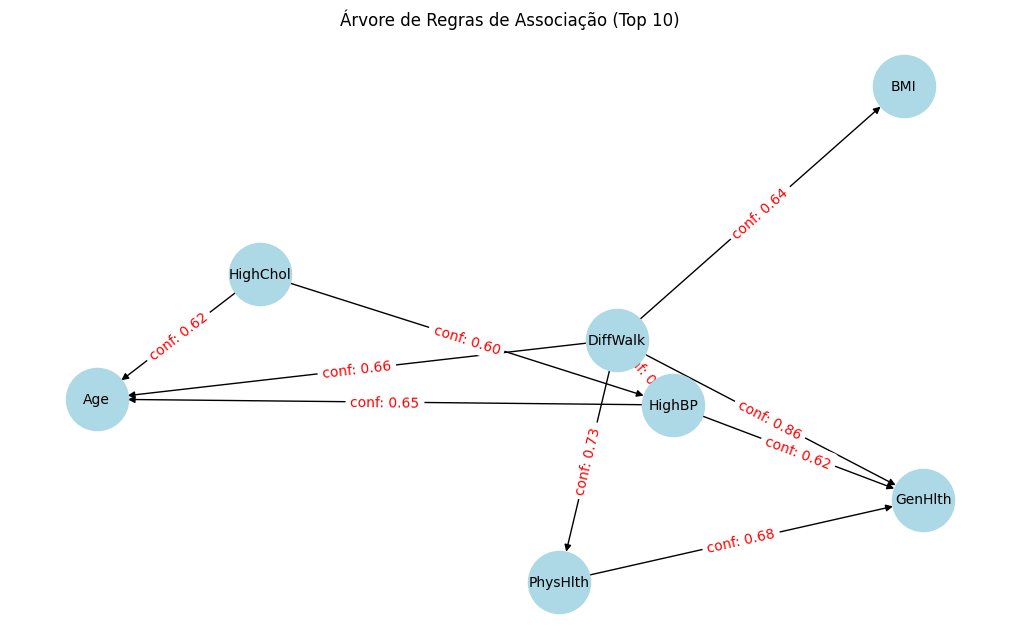

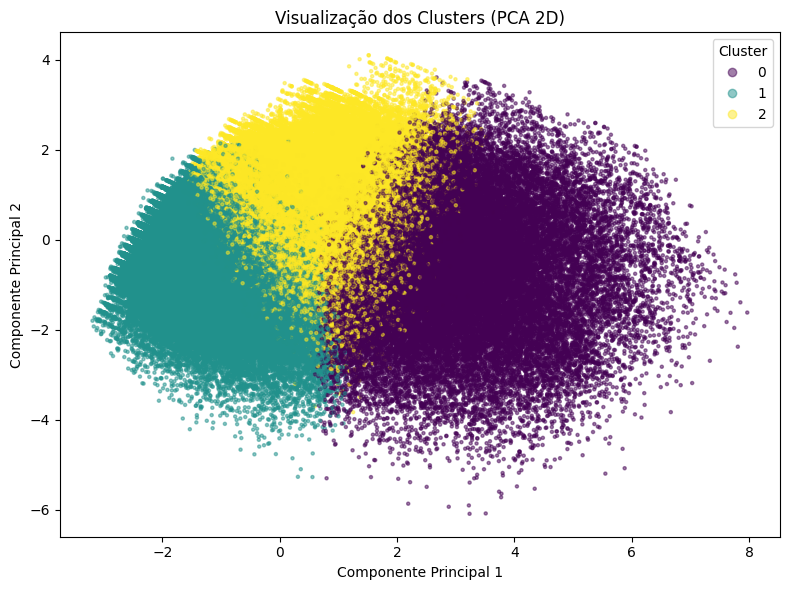

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Exibir as regras de associa√ß√£o em formato de √°rvore
def plot_association_rules_tree(rules, max_rules=10):
	G = nx.DiGraph()
	shown = 0
	for _, row in rules.head(max_rules).iterrows():
		antecedents = ', '.join([str(a) for a in row['antecedents']])
		consequents = ', '.join([str(c) for c in row['consequents']])
		G.add_edge(antecedents, consequents, weight=row['confidence'])
		shown += 1
	pos = nx.spring_layout(G, k=1.5)
	plt.figure(figsize=(10, 6))
	nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10, arrows=True)
	edge_labels = nx.get_edge_attributes(G, 'weight')
	edge_labels = {k: f"conf: {v:.2f}" for k, v in edge_labels.items()}
	nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
	plt.title('√Årvore de Regras de Associa√ß√£o (Top 10)')
	plt.show()

plot_association_rules_tree(rules)

# Gr√°fico de pontos dos clusters (usando duas features principais para visualiza√ß√£o)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5, s=5)
plt.title('Visualiza√ß√£o dos Clusters (PCA 2D)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

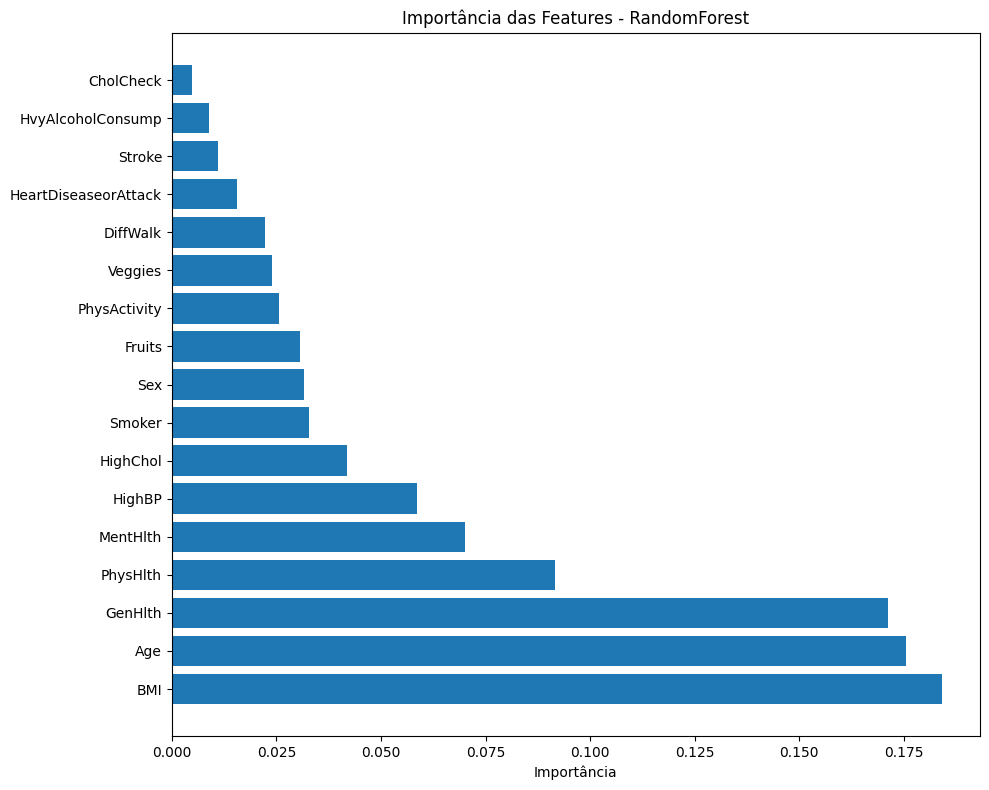

In [ ]:
#Importancia com feature_importances j√° que o SHAP pode demorar muito
model = RandomForestClassifier(max_depth=None,  random_state=32).fit(X_train_bal, y_train_bal)
importances = model.feature_importances_
importancia_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(importancia_df['feature'], importancia_df['importance'])
plt.xlabel('Import√¢ncia')
plt.title('Import√¢ncia das Features - RandomForest')
plt.tight_layout()
plt.show()

In [ ]:
import shap
from sklearn.ensemble import RandomForestClassifier

X_train_bal_df = pd.DataFrame(X_train_bal, columns=X.columns)


amostra = X_train_bal_df.sample(1000, random_state=32)
# SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(amostra)

# Plot
shap.summary_plot(shap_values, amostra)

/home/gabriel/Projetos/Pessoal/kessimha/pi-dsm-6-2025/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Explica√ß√£o do Processo de Extra√ß√£o de Padr√µes e Import√¢ncia das Vari√°veis

Nesta etapa do projeto, foram aplicadas t√©cnicas de **clusteriza√ß√£o (KMeans)**, **extra√ß√£o de regras de associa√ß√£o (Apriori)** e an√°lise de **import√¢ncia de vari√°veis** para identificar padr√µes relevantes e fatores de risco associados ao diabetes na base de dados.

---

## 1. Clusteriza√ß√£o com KMeans

O algoritmo KMeans foi utilizado para agrupar os indiv√≠duos em tr√™s clusters, correspondendo √†s classes: n√£o diab√©tico, pr√©-diab√©tico e diab√©tico.

```python
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_norm)
df_clusters = pd.DataFrame(X_norm, columns=X.columns)
df_clusters['Cluster'] = clusters

print(df_clusters['Cluster'].value_counts())
```

---

## 2. Extra√ß√£o de Regras de Associa√ß√£o (Apriori)

Para aplicar o Apriori, as vari√°veis foram binarizadas considerando a mediana como limiar. Assim, foi poss√≠vel identificar padr√µes frequentes de caracter√≠sticas nos dados.

```python
from mlxtend.frequent_patterns import apriori, association_rules

X_bin = X.copy()
for col in X_bin.columns:
	X_bin[col] = (X_bin[col] > X_bin[col].median()).astype(int)

frequent_itemsets = apriori(X_bin, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
print(rules.head())
```

---

## 3. Visualiza√ß√£o das Regras e dos Clusters

As regras de associa√ß√£o foram visualizadas em formato de √°rvore para facilitar a interpreta√ß√£o, e os clusters foram projetados em 2D usando PCA.

```python
def plot_association_rules_tree(rules, max_rules=10):
	# ... (fun√ß√£o conforme implementada)
plot_association_rules_tree(rules)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5, s=5)
plt.title('Visualiza√ß√£o dos Clusters (PCA 2D)')
plt.show()
```

---

## 4. Import√¢ncia das Vari√°veis

Para identificar os atributos mais relevantes na classifica√ß√£o, foi utilizada a propriedade `feature_importances_` do RandomForest. O m√©todo SHAP, apesar de mais interpret√°vel, foi descartado devido ao tempo excessivo de processamento em conjuntos de dados grandes.

```python
model = RandomForestClassifier(max_depth=None, random_state=32).fit(X_train_bal, y_train_bal)
importances = model.feature_importances_
importancia_df = pd.DataFrame({
	'feature': X.columns,
	'importance': importances
}).sort_values(by='importance', ascending=False)

plt.barh(importancia_df['feature'], importancia_df['importance'])
plt.xlabel('Import√¢ncia')
plt.title('Import√¢ncia das Features - RandomForest')
plt.show()
```

> **Observa√ß√£o:**  
> O m√©todo SHAP foi testado, por√©m n√£o concluiu a execu√ß√£o devido ao alto custo computacional. Por isso, optou-se pelo uso do `feature_importances_` do RandomForest, que forneceu resultados r√°pidos e satisfat√≥rios para a an√°lise de import√¢ncia dos atributos.

---

## **Resumo**

O processo de extra√ß√£o de padr√µes permitiu identificar grupos de risco, padr√µes de comportamento e os fatores mais relevantes para a classifica√ß√£o do diabetes, subsidiando recomenda√ß√µes personalizadas e a√ß√µes preventivas.

# üìä An√°lise de Padr√µes e Insights sobre Diabetes

A an√°lise realizada sobre a base de dados de classifica√ß√£o de diabetes (n√£o diab√©tico, pr√©-diab√©tico, diab√©tico) revelou importantes padr√µes por meio de diferentes abordagens: RandomForest, PCA para clusteriza√ß√£o e regras de associa√ß√£o com Apriori. Abaixo, s√£o apresentados os principais insights extra√≠dos.

---

## 1. Import√¢ncia das Vari√°veis (Random Forest)

As vari√°veis mais influentes para a predi√ß√£o de diabetes foram:

| Vari√°vel     | Interpreta√ß√£o                                                   |
| ------------ | --------------------------------------------------------------- |
| **BMI**      | Maior IMC est√° fortemente associado ao risco de diabetes        |
| **Age**      | Idade avan√ßada contribui diretamente para o risco               |
| **GenHlth**  | Avalia√ß√£o geral da sa√∫de √© um fator chave                       |
| **PhysHlth** | Problemas f√≠sicos tamb√©m contribuem significativamente          |
| **MentHlth** | A sa√∫de mental aparece com import√¢ncia moderada                 |
| **HighBP**   | Press√£o alta √© um indicativo comum entre pacientes com diabetes |

> Existe um perfil de risco baseado em idade, obesidade e percep√ß√£o de sa√∫de ruim.

---

## 2. Clusteriza√ß√£o (PCA 2D)

A an√°lise por PCA revelou tr√™s agrupamentos bem definidos:

| Cluster | Interpreta√ß√£o Prov√°vel                        |
| ------- | --------------------------------------------- |
| 0       | Prov√°vel maioria dos **n√£o diab√©ticos**       |
| 1       | Prov√°veis **pr√©-diab√©ticos**                  |
| 2       | Grupo mais distinto, prov√°veis **diab√©ticos** |

> Mesmo sem rotular as classes, podemos ver separa√ß√£o clara, evidenciando a qualidade da base de dados

---

## 3. Regras de Associa√ß√£o (Apriori)

As principais regras com maior confian√ßa identificadas foram:

| Regra                 | Confian√ßa | Interpreta√ß√£o                                         |
| --------------------- | --------- | ----------------------------------------------------- |
| `DiffWalk ‚Üí PhysHlth` | 0.73      | Dificuldade para andar se associa a sa√∫de f√≠sica ruim |
| `HighBP ‚Üí GenHlth`    | 0.86      | Press√£o alta est√° ligada a sa√∫de geral ruim           |
| `DiffWalk ‚Üí GenHlth`  | 0.62      | Problemas locomotores indicam sa√∫de ruim              |
| `HighChol ‚Üí Age`      | 0.62      | Colesterol alto tende a ocorrer em idosos             |

>  Fatores de risco se encadeiam: hipertens√£o, mobilidade prejudicada e sa√∫de percebida comp√µem um caminho de alerta.

---

## Conclus√µes sobre as an√°lises dos padr√µes obtidos 

O procedimento realizado, indica que um fator de risco para diabetes √© idade + imc + idade. A an√°lise de Random Forest destacou a import√¢ncia do IMC e da idade, enquanto a clusteriza√ß√£o por PCA separou claramente os grupos de n√£o diab√©ticos, pr√©-diab√©ticos e diab√©ticos. As regras de associa√ß√£o refor√ßaram a conex√£o entre hipertens√£o, problemas de mobilidade e percep√ß√£o negativa da sa√∫de.
A combina√ß√£o dessas an√°lises fornece uma vis√£o abrangente dos fatores de risco associados ao diabetes, permitindo identificar grupos vulner√°veis e direcionar interven√ß√µes espec√≠ficas.

---

## Implica√ß√µes Pr√°ticas

Esses insights podem ser utilizados para direcionar interven√ß√µes de sa√∫de p√∫blica, campanhas de conscientiza√ß√£o e estrat√©gias de preven√ß√£o focadas nos grupos de risco identificados. A combina√ß√£o dessas t√©cnicas anal√≠ticas oferece uma vis√£o abrangente e pr√°tica sobre o diabetes, permitindo a√ß√µes mais eficazes na gest√£o da doen√ßa.

---
